### 생각해본 전체 방향성 
1. 현재 청소년 수련활동 프로그램의 분포와 특징은 무엇인가? - 메인 데이터 eda 
2. 학교와 수련원 간 거리와 접근성이 청소년 활동 참여에 어떤 영향을 미치는가? - 학교 좌표랑 같이 분석 
3. 청소년 활동 프로그램 접근성 개선을 위해 어떤 방안을 제안할 수 있는가? - 활성화 방안 아이디어 제시 

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'AppleGothic' 

# 1. 데이터 불러오기

In [3]:
file_path = 'data.csv'
data = pd.read_csv(file_path, encoding='cp949')

In [4]:
print(data.head())

   인증번호     지역 활동유형  운영방식    기관유형1    기관유형2        활동영역  \
0   375  부산광역시  기본형  대면방식  청소년수련시설  청소년문화의집  자기(인성)계발활동   
1   938  부산광역시  기본형  대면방식  청소년수련시설   청소년수련관      문화예술활동   
2  1629  부산광역시  기본형  대면방식  청소년수련시설   청소년수련관      환경보존활동   
3  1814    경기도  기본형  대면방식  청소년수련시설   청소년수련관        봉사활동   
4  1817    경기도  기본형  대면방식  청소년수련시설   청소년수련관  자기(인성)계발활동   

                                                활동명            기관명 컨소시엄기관명  \
0                     청소년 독서지도 프로그램 [책을 알고, 나를 알자!]    부산북구청소년문화의집    해당없음   
1  청소년 영상제작체험을 통한 표현력 강화 프로그램 `오목~ 조목~ 애니메이션 愛 빠지다`  부산광역시양정청소년수련관    해당없음   
2                          청소년의 아름다운 날개짓 `ECO 나비효과`  부산광역시양정청소년수련관    해당없음   
3                                    동행 `함께하는 아름다움`     김포중봉청소년수련관    해당없음   
4                                      웃으면 복(福)이 와요     김포중봉청소년수련관    해당없음   

         인증일자        유효일자  중지여부      중지시작일자      중지종료일자   대상연령  대상인원    참가비  \
0  11/01/2008  10/01/2024  해당없음  20/12/2020  19/12/2023  초,중,고    30      0   
1  24/08/2009  23/

# 2. 2020~2024년 데이터 필터링

In [5]:
data['인증일자'] = pd.to_datetime(data['인증일자'], errors='coerce').dt.year  # 연도가 문자열로 되어 있으면 datetime 형식으로 변환 후 연도 추출
data = data[(data['인증일자'] >= 2020) & (data['인증일자'] <= 2024)]

In [7]:
# 필터링된 데이터 확인
print(data['인증일자'].unique())

[2020. 2021. 2022. 2023. 2024.]


# 3. 주요 변수 분석 및 시각화

### 1. 지역별 프로그램 분포

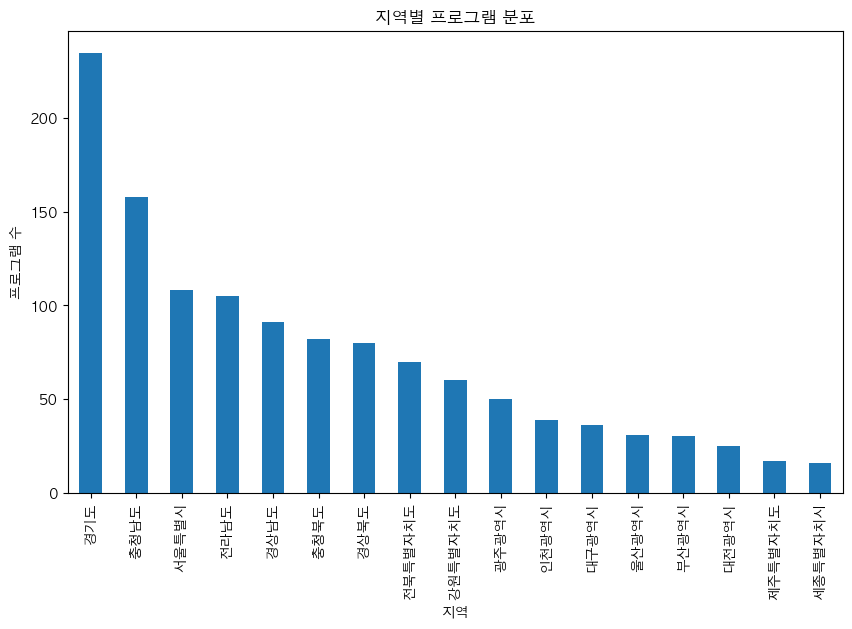

In [8]:
# 지역별 프로그램 분포
plt.figure(figsize=(10, 6))
data['지역'].value_counts().plot(kind='bar')
plt.title('지역별 프로그램 분포')
plt.xlabel('지역')
plt.ylabel('프로그램 수')
plt.show()

### 2. 활동 유형별 프로그램 분포 

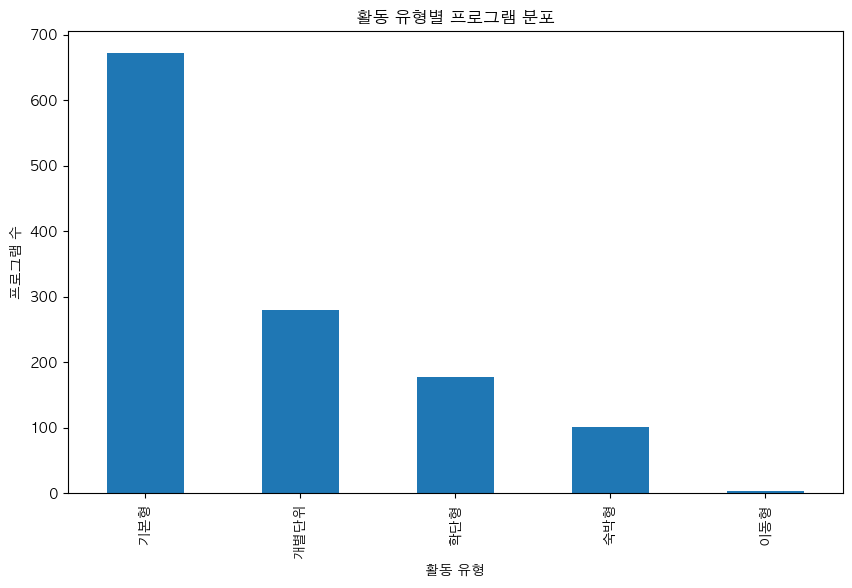

In [9]:
# 활동 유형별 프로그램 분포
plt.figure(figsize=(10, 6))
data['활동유형'].value_counts().plot(kind='bar')
plt.title('활동 유형별 프로그램 분포')
plt.xlabel('활동 유형')
plt.ylabel('프로그램 수')
plt.show()

### 3. 운영 방식별 프로그램 분포

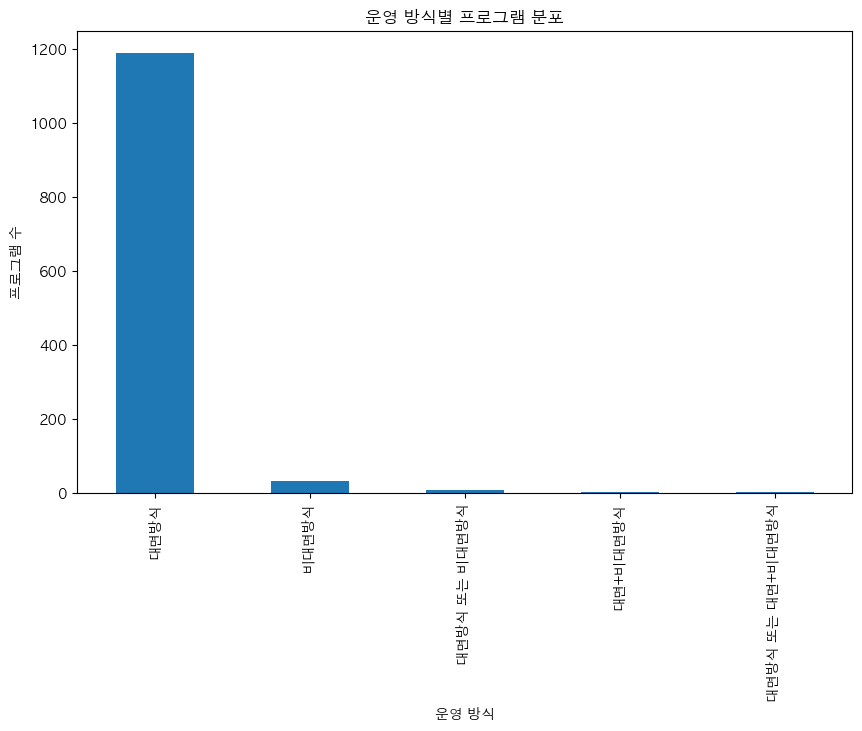

In [10]:
# 운영 방식별 프로그램 분포
plt.figure(figsize=(10, 6))
data['운영방식'].value_counts().plot(kind='bar')
plt.title('운영 방식별 프로그램 분포')
plt.xlabel('운영 방식')
plt.ylabel('프로그램 수')
plt.show()

저거 다 합쳐야함. 전처리 필요 

### 4. 대상 연령별 프로그램 분포

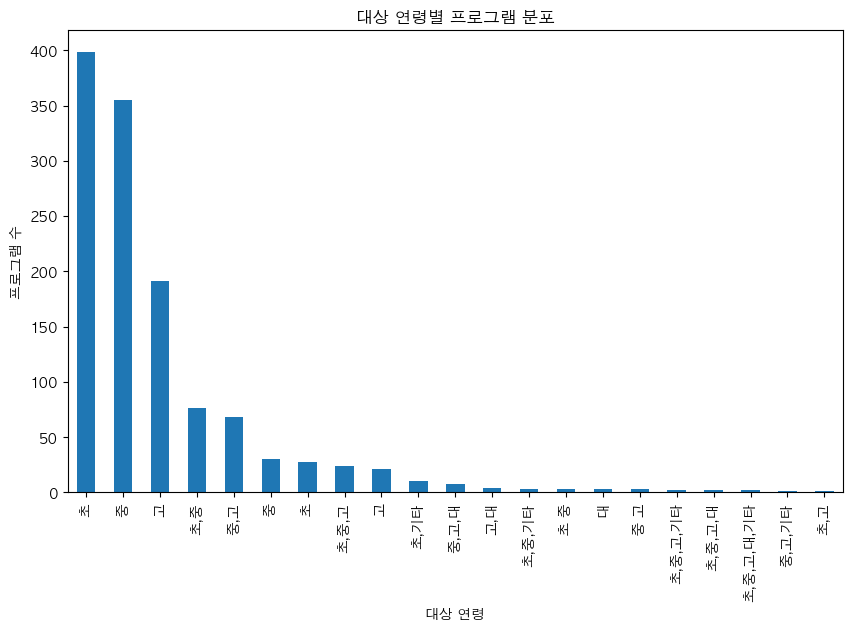

In [11]:

plt.figure(figsize=(10, 6))
data['대상연령'].value_counts().plot(kind='bar')
plt.title('대상 연령별 프로그램 분포')
plt.xlabel('대상 연령')
plt.ylabel('프로그램 수')
plt.show()

-> 칼럼값 전처리 필요 

In [12]:
# '대상 연령' 열의 고유값 나열
unique_ages = data['대상연령'].unique()
print(unique_ages)


['초,중,고' '초' '중' '고' '중,고' '초,중' '중,고,대' '초,중,고,대,기타' '고,대' '초,고' '대'
 '초,기타' '중,고,기타' '초,중,고,대' '초,중,고,기타' '초,중,기타' ' 고' ' 초' ' 중' ' 초 중'
 ' 중 고']


In [13]:
# 먼저, 데이터를 정리할 기준 사전을 만듭니다.
age_groups = {
    '초': '초', ' 초': '초', '초,': '초', '초,기타': '초', '초,중': '초중', '초 중': '초중',
    '초,고': '초고', '초,중,고': '초중고', '초,중,고,대': '초중고대', '초,중,고,기타': '초중고',
    '초,중,기타': '초중', '초,중,고,대,기타': '초중고대', ' 초 중': '초중',
    '중': '중', ' 중': '중', '중,고': '중고', ' 중 고': '중고', '중,고,기타': '중고',
    '고': '고', ' 고': '고', '고,대': '고대',
    '대': '대', '중,고,대': '중고대', '기타': '기타'
}



In [14]:
# '대상 연령' 열의 값을 age_groups 사전에 따라 변환
data['대상연령'] = data['대상연령'].replace(age_groups)

# 변환 후 결과 확인
print(data['대상연령'].unique())


['초중고' '초' '중' '고' '중고' '초중' '중고대' '초중고대' '고대' '초고' '대']


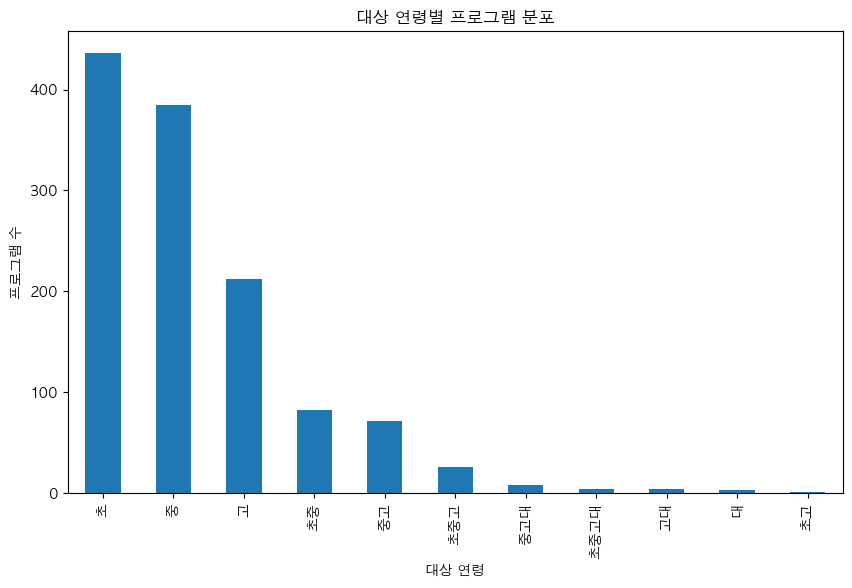

In [15]:

plt.figure(figsize=(10, 6))
data['대상연령'].value_counts().plot(kind='bar')
plt.title('대상 연령별 프로그램 분포')
plt.xlabel('대상 연령')
plt.ylabel('프로그램 수')
plt.show()

### 대상 연령 전처리 더 해야할듯.. 

### 5. 참가비 분포

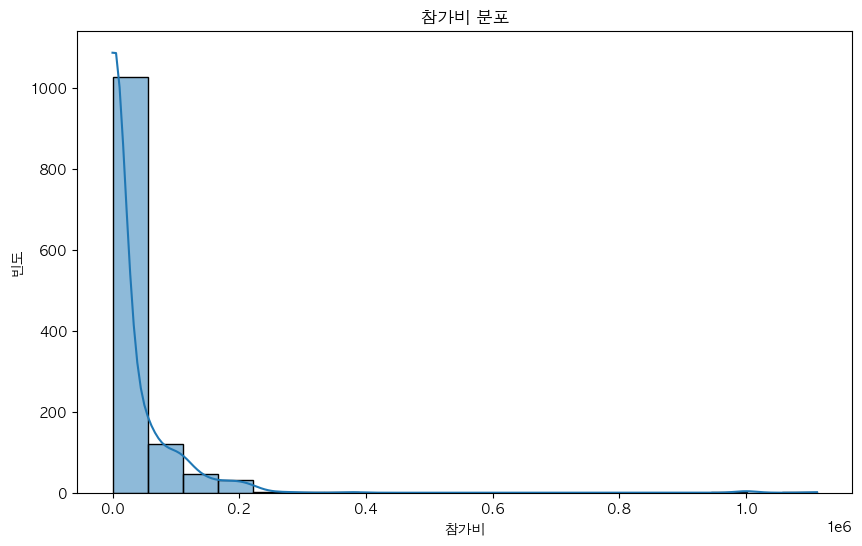

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['참가비'], bins=20, kde=True)
plt.title('참가비 분포')
plt.xlabel('참가비')
plt.ylabel('빈도')
plt.show()

In [18]:
#걍 거의 다 무료 or 저가 

# 4. 청소년 활동 프로그램 분포 분석

###  1. 연도별, 지역별, 연령별 프로그램 분포 시각화

In [19]:
# 1. 연도별 프로그램 분포
plt.figure(figsize=(10, 6))
sns.countplot(x='연도', data=data)
plt.title('연도별 프로그램 분포')
plt.xlabel('연도')
plt.ylabel('프로그램 수')
plt.show()

ValueError: Could not interpret input '연도'

<Figure size 1000x600 with 0 Axes>

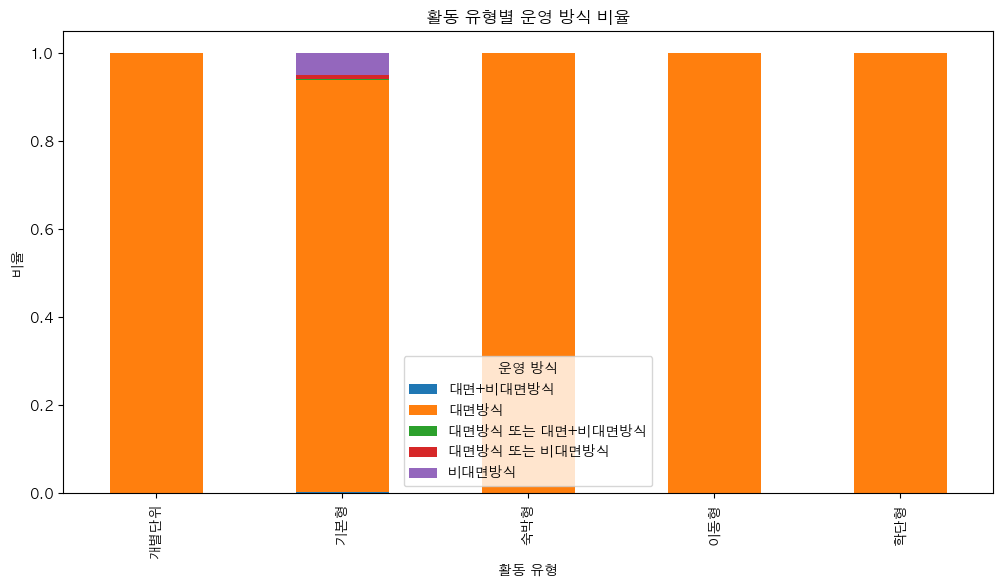

In [20]:
# 활동 유형과 운영 방식의 연관성 파악
activity_operation = pd.crosstab(data['활동유형'], data['운영방식'], normalize='index')
activity_operation.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('활동 유형별 운영 방식 비율')
plt.xlabel('활동 유형')
plt.ylabel('비율')
plt.legend(title='운영 방식')
plt.show()


-> 사실상 다 대면이 주요 -> 나중에 활성화 방안으로 비대면으로 교육 프로그램 더 만들자 ~ 

### 2. 연령별 프로그램 유형 분포 

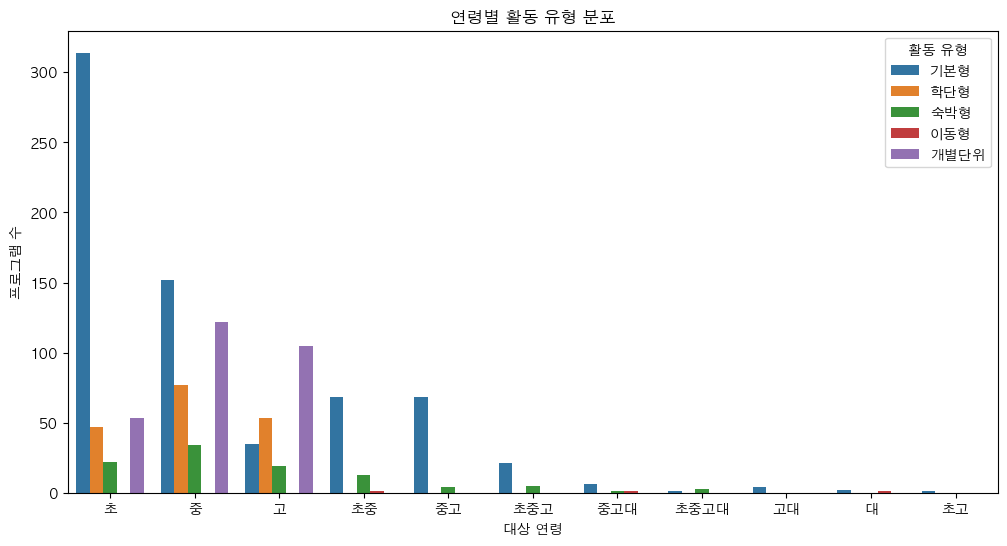

In [21]:
# 연령별 프로그램 유형 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='대상연령', hue='활동유형', data=data, order=data['대상연령'].value_counts().index)
plt.title('연령별 활동 유형 분포')
plt.xlabel('대상 연령')
plt.ylabel('프로그램 수')
plt.legend(title='활동 유형')
plt.show()


### 3. 지역 및 연령별 프로그램 격차 분석을 통한 정책 제안



- 목적: 지역 및 연령별로 프로그램이 균형 있게 제공되고 있는지 확인하고, 특정 연령대나 지역에 프로그램이 부족한 경우 해당 문제를 해소할 정책을 제안합니다.
- 분석 방법: 지역과 연령대를 교차 분석하여 특정 지역/연령대에 프로그램이 부족한지를 확인합니다.

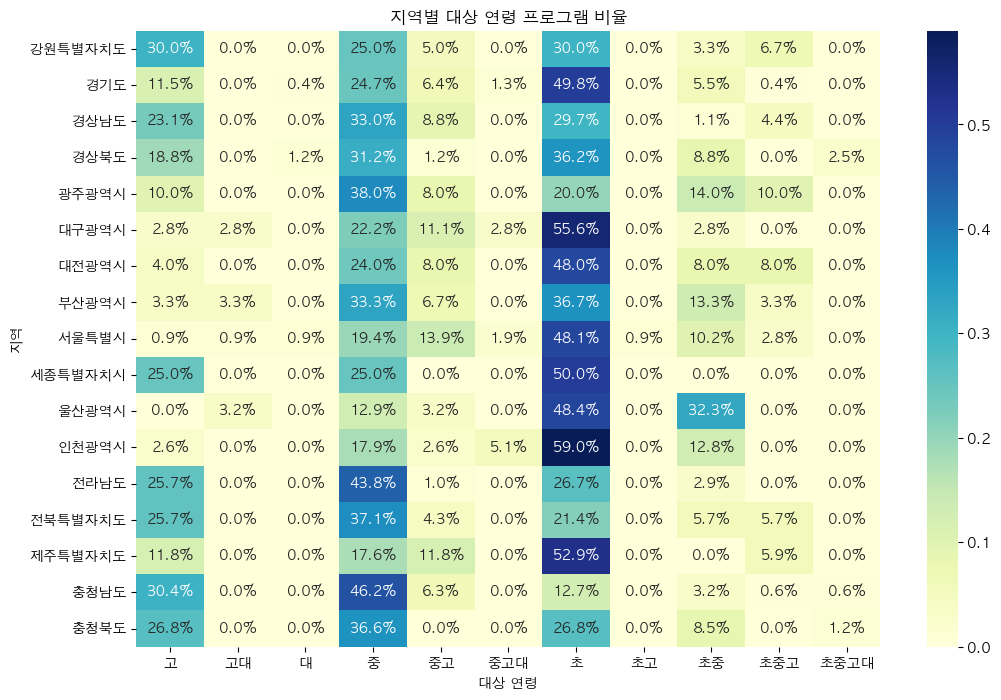

In [22]:
# 지역과 연령대 간 프로그램 수 분포 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(data['지역'], data['대상연령'], normalize='index'), cmap="YlGnBu", annot=True, fmt=".1%")
plt.title('지역별 대상 연령 프로그램 비율')
plt.xlabel('대상 연령')
plt.ylabel('지역')
plt.show()


### 4. 특정 활동 유형에 대한 청소년의 접근성 개선 필요성 평가



- 목적: 특정 활동 유형에 대한 프로그램이 특정 지역이나 연령층에 집중되어 있는지 확인하여, 다양한 청소년들이 다양한 활동에 접근할 수 있도록 개선할 방안을 모색합니다.
- 분석 방법: 활동 유형과 지역, 연령대의 교차 분석을 통해 특정 활동 유형이 특정 지역이나 연령에 편중되어 있는지 확인합니다.

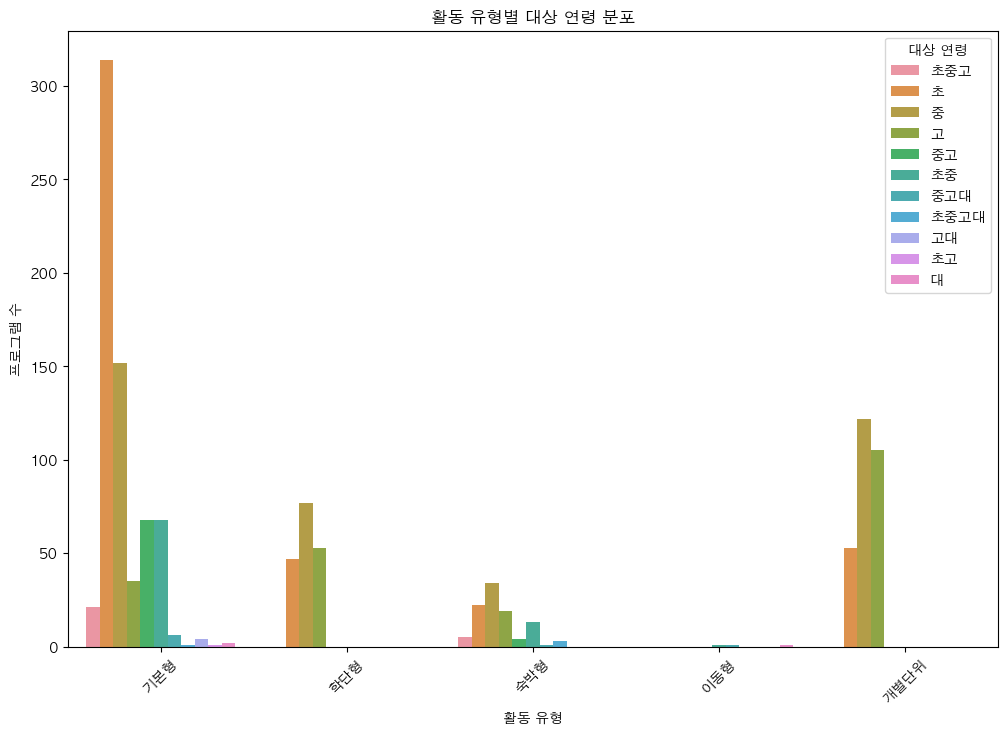

In [23]:
# 활동 유형과 지역, 연령대의 교차 분석
plt.figure(figsize=(12, 8))
sns.countplot(x='활동유형', hue='대상연령', data=data)
plt.title('활동 유형별 대상 연령 분포')
plt.xlabel('활동 유형')
plt.ylabel('프로그램 수')
plt.legend(title='대상 연령')
plt.xticks(rotation=45)
plt.show()